# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
# import http://localhost:8888/notebooks/WeatherPy/WeatherPy.ipynb #numpy as np
import requests
import time
from scipy.stats import linregress
import numpy as np
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 631


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
# query_url = f"{url}appid={weather_api_key}&units=metric&q={city}"
# cityw = requests.get(query_url)
# citywj= cityw.json()
# pprint(citywj, indent=4)

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}appid={weather_api_key}&units=metric&q={city}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]['lat']
        city_lng = city_weather["coord"]['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather["sys"]["country"]
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})


    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | dzilam gonzalez
Processing Record 2 of Set 1 | trstena
Processing Record 3 of Set 1 | chipinge
Processing Record 4 of Set 1 | mlandizi
Processing Record 5 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 6 of Set 1 | demirci
Processing Record 7 of Set 1 | alofi
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | torbay
Processing Record 10 of Set 1 | samusu
City not found. Skipping...
Processing Record 11 of Set 1 | hobart
Processing Record 12 of Set 1 | male
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | ningan
City not found. Skipping...
Processing Record 15 of Set 1 | yeppoon
Processing Record 16 of Set 1 | provideniya
Processing Record 17 of Set 1 | severo-kurilsk
Processing Record 18 of Set 1 | zharkovskiy
Processing Record 19 of Set 1 | kodiak
Processing Record 20 of Set 1 | marawi
Processing Record 21 of Set 1 | lorengau
Proce

Processing Record 36 of Set 4 | ostrovnoy
Processing Record 37 of Set 4 | ous
Processing Record 38 of Set 4 | shelburne
Processing Record 39 of Set 4 | kidal
Processing Record 40 of Set 4 | timberlake
Processing Record 41 of Set 4 | promyshlennaya
Processing Record 42 of Set 4 | tasiilaq
Processing Record 43 of Set 4 | poum
Processing Record 44 of Set 4 | wanning
Processing Record 45 of Set 4 | svetlogorsk
Processing Record 46 of Set 4 | hambantota
Processing Record 47 of Set 4 | itambacuri
Processing Record 48 of Set 4 | teguldet
Processing Record 49 of Set 4 | tubruq
City not found. Skipping...
Processing Record 0 of Set 5 | andenes
Processing Record 1 of Set 5 | predivinsk
Processing Record 2 of Set 5 | touros
Processing Record 3 of Set 5 | dong hoi
Processing Record 4 of Set 5 | wulanhaote
City not found. Skipping...
Processing Record 5 of Set 5 | clyde river
Processing Record 6 of Set 5 | upernavik
Processing Record 7 of Set 5 | cocobeach
Processing Record 8 of Set 5 | srednekolym

Processing Record 22 of Set 8 | beya
Processing Record 23 of Set 8 | urusha
Processing Record 24 of Set 8 | bafq
Processing Record 25 of Set 8 | kaeo
Processing Record 26 of Set 8 | panzhihua
Processing Record 27 of Set 8 | maine-soroa
Processing Record 28 of Set 8 | taltal
Processing Record 29 of Set 8 | payson
Processing Record 30 of Set 8 | whyalla
Processing Record 31 of Set 8 | preeceville
Processing Record 32 of Set 8 | port-cartier
Processing Record 33 of Set 8 | atar
Processing Record 34 of Set 8 | cortez
Processing Record 35 of Set 8 | east hemet
Processing Record 36 of Set 8 | lavrentiya
Processing Record 37 of Set 8 | walvis bay
Processing Record 38 of Set 8 | nigde
Processing Record 39 of Set 8 | starkville
Processing Record 40 of Set 8 | zabaykalsk
Processing Record 41 of Set 8 | abha
Processing Record 42 of Set 8 | kimbe
Processing Record 43 of Set 8 | harur
Processing Record 44 of Set 8 | aranos
Processing Record 45 of Set 8 | monteiro
Processing Record 46 of Set 8 | kav

Processing Record 14 of Set 12 | matata
Processing Record 15 of Set 12 | bandar-e lengeh
Processing Record 16 of Set 12 | la ronge
Processing Record 17 of Set 12 | lunenburg
Processing Record 18 of Set 12 | grand gaube
Processing Record 19 of Set 12 | aklavik
Processing Record 20 of Set 12 | tilichiki
Processing Record 21 of Set 12 | zhuhai
Processing Record 22 of Set 12 | nuevo progreso
Processing Record 23 of Set 12 | bolgatanga
Processing Record 24 of Set 12 | torrington
Processing Record 25 of Set 12 | lodwar
Processing Record 26 of Set 12 | khargone
Processing Record 27 of Set 12 | touba
Processing Record 28 of Set 12 | fairbanks
Processing Record 29 of Set 12 | rutul
Processing Record 30 of Set 12 | arroio grande
Processing Record 31 of Set 12 | lata
Processing Record 32 of Set 12 | shieli
Processing Record 33 of Set 12 | baruun-urt
Processing Record 34 of Set 12 | tabou
Processing Record 35 of Set 12 | witu
Processing Record 36 of Set 12 | madimba
Processing Record 37 of Set 12 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          583
Lat           583
Lng           583
Max Temp      583
Humidity      583
Cloudiness    583
Wind Speed    583
Country       583
Date          583
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,dzilam gonzalez,21.2833,-88.9333,27.04,87,4,6.68,MX,1689094836
1,trstena,49.3610,19.6125,21.07,66,13,1.30,SK,1689094840
2,chipinge,-20.1883,32.6236,8.50,88,100,2.11,ZW,1689094841
3,mlandizi,-6.7000,38.7333,23.32,87,97,1.01,TZ,1689094841
4,demirci,39.0461,28.6589,21.98,48,0,2.85,TR,1689094842


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dzilam gonzalez,21.2833,-88.9333,27.04,87,4,6.68,MX,1689094836
1,trstena,49.3610,19.6125,21.07,66,13,1.30,SK,1689094840
2,chipinge,-20.1883,32.6236,8.50,88,100,2.11,ZW,1689094841
3,mlandizi,-6.7000,38.7333,23.32,87,97,1.01,TZ,1689094841
4,demirci,39.0461,28.6589,21.98,48,0,2.85,TR,1689094842


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

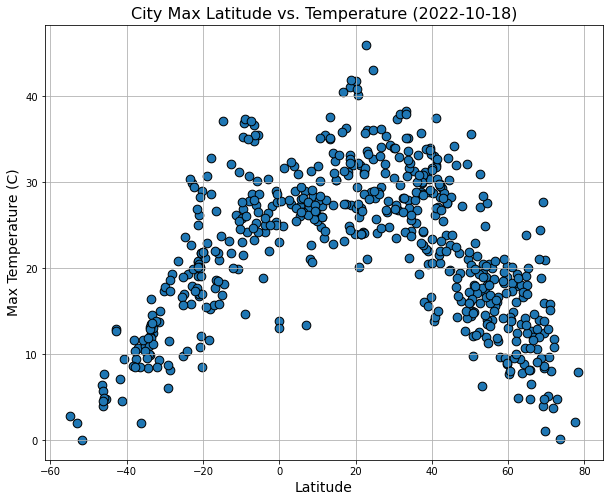

In [17]:
# Build scatter plot for latitude vs. temperature
x = city_data_df["Lat"]
y = city_data_df["Max Temp"]
plt.figure(figsize=(10, 8))
plt.scatter(x, y, edgecolors='black', s=75)

# Incorporate the other graph properties

plt.title("City Max Latitude vs. Temperature (2022-10-18)", fontsize=16)

plt.xlabel("Latitude", fontsize=14)

plt.ylabel("Max Temperature (C)", fontsize=14)

plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

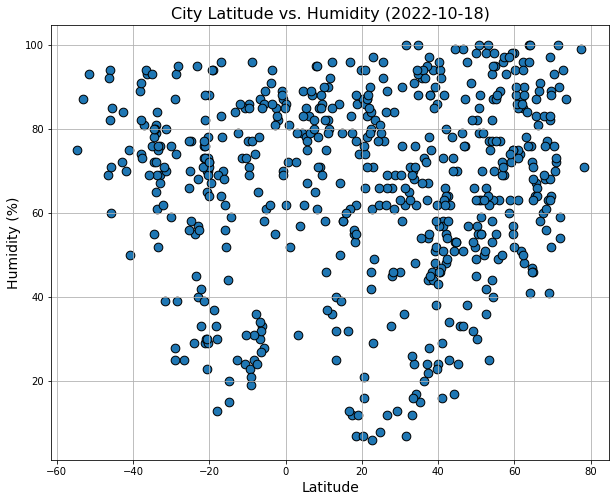

In [19]:
# Build the scatter plots for latitude vs. humidity
x = city_data_df["Lat"]
y_hum = city_data_df["Humidity"]
plt.figure(figsize=(10, 8))
plt.scatter(x, y_hum, edgecolors='black', s=75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)", fontsize=16)

plt.xlabel("Latitude", fontsize=14)

plt.ylabel("Humidity (%)", fontsize=14)

plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

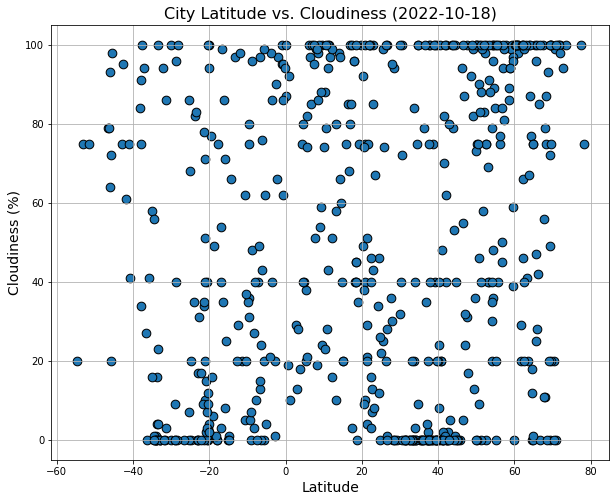

In [20]:
# Build the scatter plots for latitude vs. cloudiness
x = city_data_df["Lat"]
y_cloud = city_data_df["Cloudiness"]
plt.figure(figsize=(10, 8))
plt.scatter(x, y_cloud, edgecolors='black', s=75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)", fontsize=16)

plt.xlabel("Latitude", fontsize=14)

plt.ylabel("Cloudiness (%)", fontsize=14)

plt.grid()
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

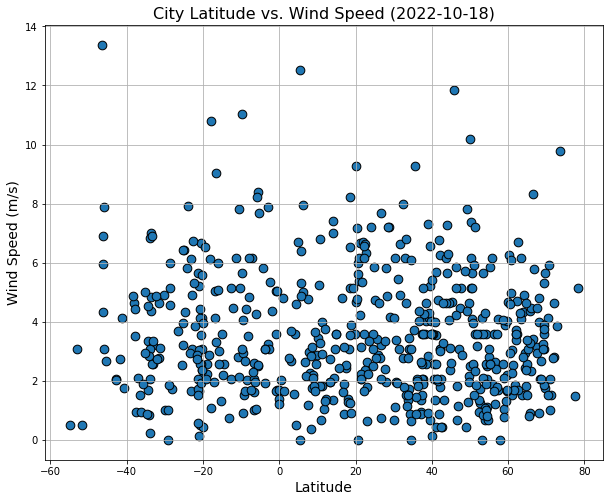

In [21]:
# Build the scatter plots for latitude vs. wind speed
x = city_data_df["Lat"]
y_wind = city_data_df["Wind Speed"]
plt.figure(figsize=(10, 8))
plt.scatter(x, y_wind, edgecolors='black', s=75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)", fontsize=16)

plt.xlabel("Latitude", fontsize=14)

plt.ylabel("Wind Speed (m/s)", fontsize=14)

plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [52]:
# Define a function to create Linear Regression plots
def line_regression(x, y, coord, y_label, title):
    
    #linear regression
    (slope,intercept,rvalue, pvalue, intercept_stderr) = linregress(x, y)
    regress_values= x*slope+intercept
    line_anno = "y= " + str(round(slope, 3)) + "x + " + str(round(intercept, 2))
    
    #plot figure and scatter
    plt.figure(figsize=(10, 8))
    plt.scatter(x, y, s=75)
    
    #Labels
    plt.xlabel("Latitude", fontsize=14)
    plt.ylabel(y_label, fontsize=14)
    plt.title(f"{title} Hemisphere: Latitude vs. {y_label} (2022-10-18)", fontsize=16)
    
    #plot linear regression line
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_anno, coord, fontsize=15, color="red")
    
    #print the r-squared value
    print(f"The r-value is: {rvalue**2}")
    
    #show the plot
    plt.show()

In [53]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi = city_data_df.loc[(city_data_df["Lat"]>=0)]
northern_hemi_df = northern_hemi.reset_index().set_index(["City_ID"])


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dzilam gonzalez,21.2833,-88.9333,27.04,87,4,6.68,MX,1689094836
1,trstena,49.3610,19.6125,21.07,66,13,1.30,SK,1689094840
4,demirci,39.0461,28.6589,21.98,48,0,2.85,TR,1689094842
7,torbay,47.6666,-52.7314,16.20,96,100,5.14,CA,1689094796
9,male,4.1748,73.5089,28.97,79,75,3.60,MV,1689094805


In [54]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi = city_data_df.loc[(city_data_df["Lat"]<0)]
southern_hemi_df = southern_hemi.reset_index().set_index(["City_ID"])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,chipinge,-20.1883,32.6236,8.50,88,100,2.11,ZW,1689094841
3,mlandizi,-6.7000,38.7333,23.32,87,97,1.01,TZ,1689094841
5,alofi,-19.0595,-169.9187,22.94,94,6,2.57,NU,1689094703
6,mataura,-46.1927,168.8643,3.96,94,64,4.35,NZ,1689094601
8,hobart,-42.8794,147.3294,12.90,72,75,2.06,AU,1689094593


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.49098355850230263


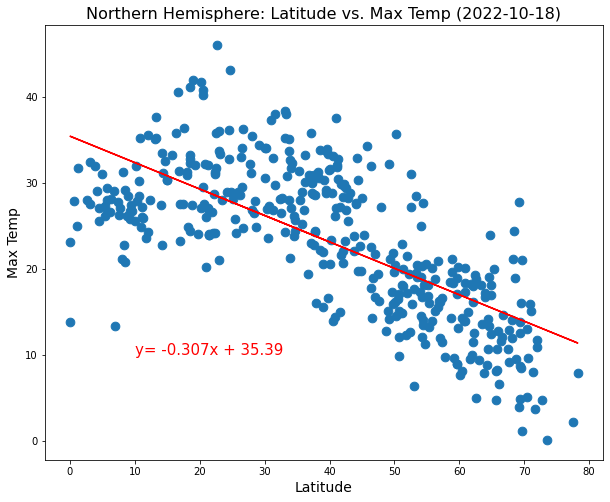

In [55]:
# Linear regression on Northern Hemisphere
x_north= northern_hemi_df["Lat"]
y_north = northern_hemi_df["Max Temp"]
line_regression(x_north, y_north, (10, 10), "Max Temp", "Northern")

The r-value is: 0.6545086940999387


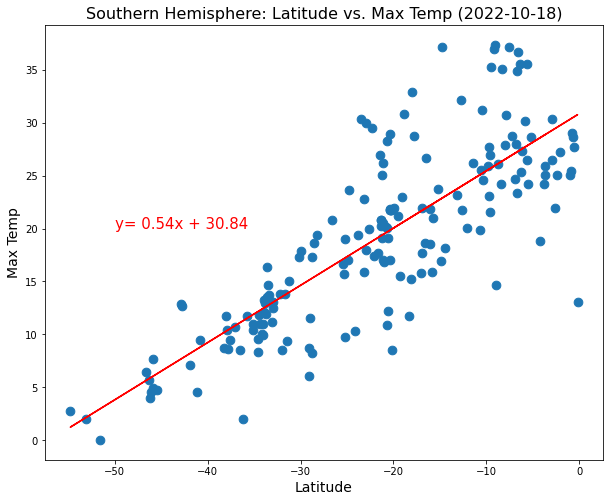

In [56]:
# Linear regression on Southern Hemisphere
x_south= southern_hemi_df["Lat"]
y_south = southern_hemi_df["Max Temp"]
line_regression(x_south, y_south, (-50, 20), "Max Temp", "Southern")

**Discussion about the linear relationship:** Both of the r-squared values for the Northern and Southern Hemispheres are above .4, therefore indicate a correlation between Max Temperature and Latitude. 

For the Northern Hemisphere, there is a negative correlation from the latitude values of 0 to 80. This means that the further away we get from the equater, the colder it will get. (Or more literally, the further from the equater the lower the max temp)

For the Southern Hemisphere, the is a positive correlation from the latitude values of -60 to 0. This means, despite the opposite correlation from the Northern Hemisphere, that the further we get from the equater, the colder it will get. (Or more literally, the closer to the equater the higher the max temp)

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.008779768274812649


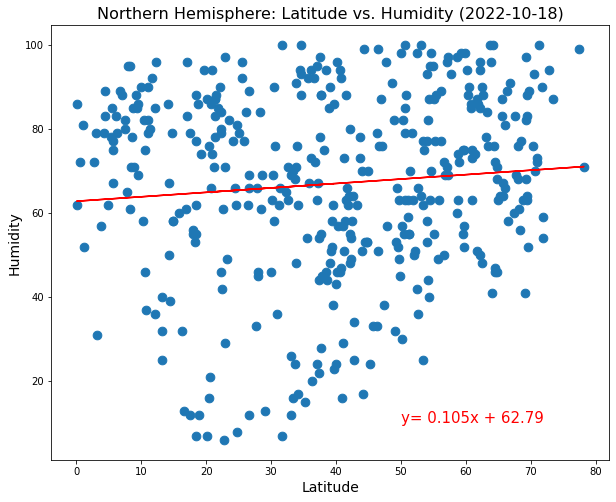

In [57]:
# Northern Hemisphere
x_north= northern_hemi_df["Lat"]
y_north_hum= northern_hemi_df["Humidity"]
line_regression(x_north, y_north_hum, (50, 10), "Humidity", "Northern")

The r-value is: 0.03886986026361208


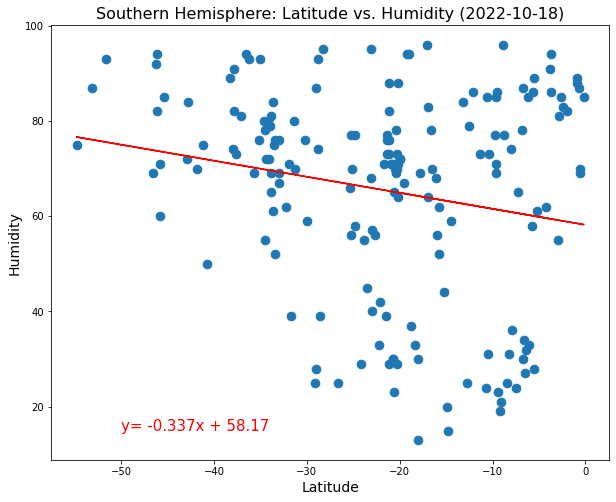

In [58]:
# Southern Hemisphere
x_south= southern_hemi_df["Lat"]
y_south_hum = southern_hemi_df["Humidity"]
line_regression(x_south, y_south_hum, (-50, 15), "Humidity", "Southern")

**Discussion about the linear relationship:** With a .009 r-squared value in the Northern Hemisphere and a .04 r-squared value in the Southern Hemisphere, there is a low correlation between Latitude and Humidity. 

Despite low correlation, the Northern Hemisphere seems to indicate a slight upward trend and the Southern Hemisphere indicates a slight downward trend. Along with the visual of both graphs having a large amount of points towards the top of the graph, we can take these trends as a possibility that there is a wider range of humidity towards the equater. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.012042920982503568


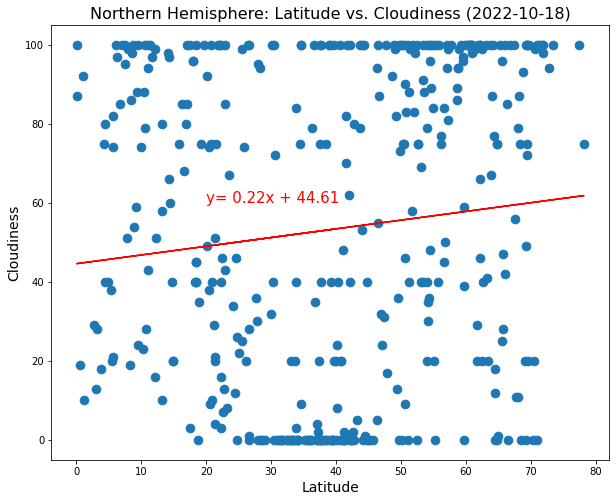

In [59]:
# Northern Hemisphere
x_north= northern_hemi_df["Lat"]
y_north_cloud = northern_hemi_df["Cloudiness"]
line_regression(x_north, y_north_cloud, (20, 60), "Cloudiness", "Northern")

The r-value is: 5.796481586404448e-05


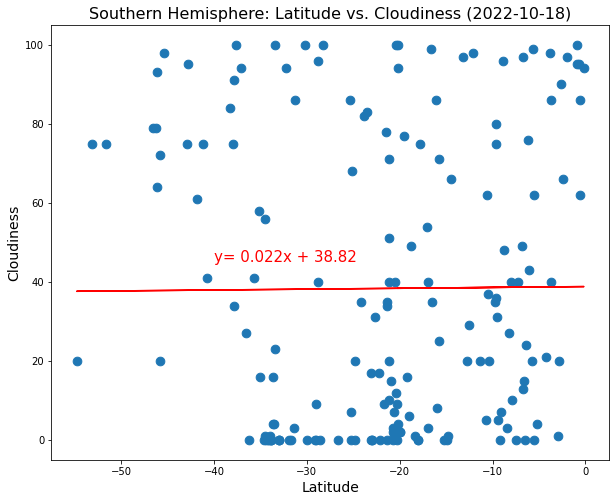

In [60]:
# Southern Hemisphere
x_south= southern_hemi_df["Lat"]
y_south_cloud = southern_hemi_df["Cloudiness"]
line_regression(x_south, y_south_cloud, (-40, 45), "Cloudiness", "Southern")

**Discussion about the linear relationship:** With a .22 r-squared value in the Northern Hemisphere and a .22 r-squared value in the Southern Hemisphere, there is a low correlation between Latitude and Cloudiness.

Despite low correlation, there are still some conclusions we can come to. This low correlation would lead us to believe that cloudiness does not depend on where we are at in regards to the equator. Cloudiness may depend more on other factors besides latitude. For instance, it may be beneficial to look into amount of cloudiness and the landscape or the nearness to the ocean. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0012150998933518485


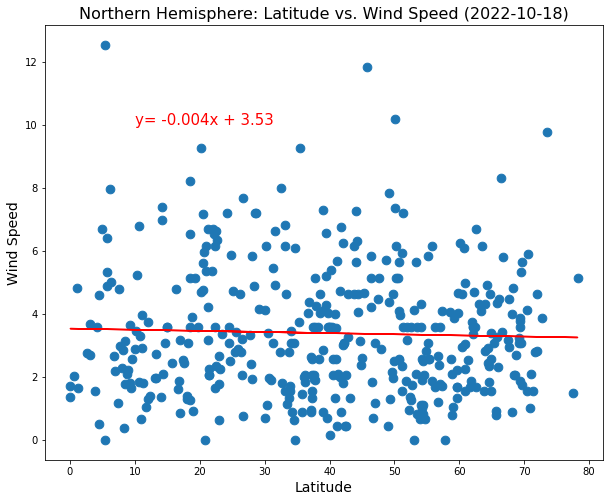

In [61]:
# Northern Hemisphere
x_north= northern_hemi_df["Lat"]
y_north_wind = northern_hemi_df["Wind Speed"]
line_regression(x_north, y_north_wind, (10,10), "Wind Speed", "Northern")

The r-value is: 0.00105547960121635


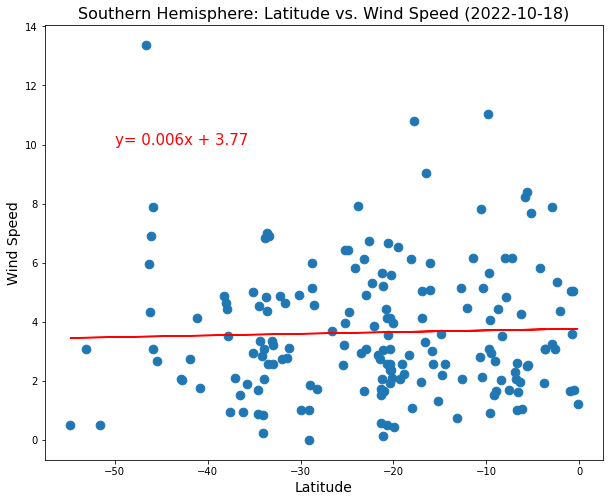

In [62]:
# Southern Hemisphere
x_south= southern_hemi_df["Lat"]
y_south_wind = southern_hemi_df["Wind Speed"]
line_regression(x_south, y_south_wind, (-50, 10), "Wind Speed", "Southern")

**Discussion about the linear relationship:** With a .001 r-squared value in the Northern Hemisphere and a .006 r-squared value in the Southern Hemisphere, there is a very low correlation between Latitude and Wind Speed.

Despite low correlation, there are still some conclusions we can come to. In both Hemispheres, there appears to be far more cities with lower windspeed than higher. It might again be a good next step to compare Wind Speed to other factors besides Latitude. The first factors I would look into would be proximity to large bodies of water and elevation.